# Liberay import

In [117]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score
import math

#  IMPORT FILE 

In [118]:
df=pd.read_csv("AAPL.csv")

In [119]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-08,116.250000,116.400002,114.589996,114.970001,114.235260,83477200
1,2020-10-09,115.279999,117.000000,114.919998,116.970001,116.222473,100506900
2,2020-10-12,120.059998,125.180000,119.279999,124.400002,123.604996,240226800
3,2020-10-13,125.269997,125.389999,119.650002,121.099998,120.326088,262330500
4,2020-10-14,121.000000,123.029999,119.620003,121.190002,120.415504,150712000


In [120]:
df.shape

(252, 7)

In [121]:
df.drop("Adj Close", axis=1)

,Date,Open,High,Low,Close,Volume
0,2020-10-08,116.250000,116.400002,114.589996,114.970001,83477200
1,2020-10-09,115.279999,117.000000,114.919998,116.970001,100506900
2,2020-10-12,120.059998,125.180000,119.279999,124.400002,240226800
3,2020-10-13,125.269997,125.389999,119.650002,121.099998,262330500
4,2020-10-14,121.000000,123.029999,119.620003,121.190002,150712000
...,...,...,...,...,...,...
247,2021-10-01,141.899994,142.919998,139.110001,142.649994,94639600
248,2021-10-04,141.759995,142.210007,138.270004,139.139999,98322000
249,2021-10-05,139.490005,142.240005,139.360001,141.110001,80861100
250,2021-10-06,139.470001,142.149994,138.369995,142.000000,83221100


In [122]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False


In [123]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [124]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [126]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,131.937143,133.313453,130.494722,131.930913,131.572806,9.620352e+07
std,11.064640,10.999958,11.095234,11.088509,11.253705,3.239754e+07
min,109.110001,110.680000,107.320000,108.769997,108.074883,4.639770e+07
25%,123.382502,124.797498,121.535000,123.060001,122.602379,7.473820e+07
50%,130.270004,131.570000,128.779999,130.659996,130.281341,8.991345e+07
75%,142.540001,144.107506,140.475002,142.157498,142.059223,1.116616e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,2.623305e+08


<AxesSubplot:>

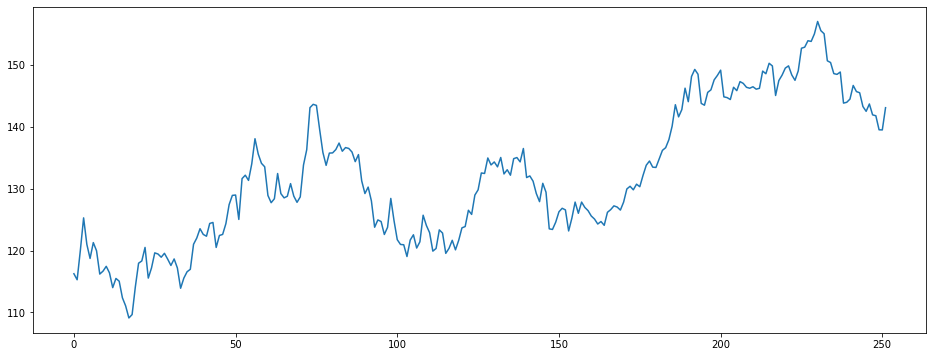

In [127]:
df["Open"].plot(figsize=(16,6))

Text(0.5, 1.0, 'Open price  Vs Close price graph')

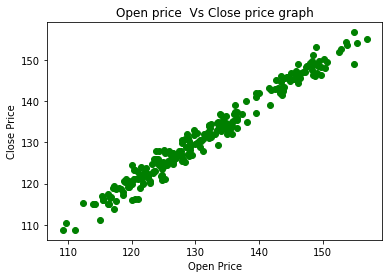

In [128]:
plt.scatter(df.Open,df.Close,marker='o',color='g')
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Open price  Vs Close price graph")

Text(0.5, 1.0, 'High price vs Close Price Graph')

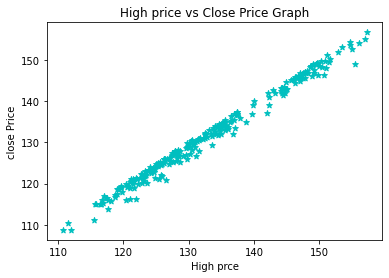

In [129]:
plt.scatter(df.High,df.Close,marker="*",color='c')
plt.xlabel('High prce')
plt.ylabel("close Price")
plt.title("High price vs Close Price Graph")

Text(0.5, 1.0, 'Low price vs Close Price graph')

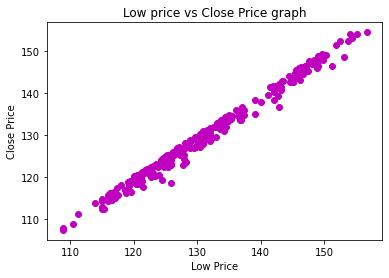

In [130]:
plt.scatter(df.Close,df.Low,color="m")
plt.xlabel("Low Price")
plt.ylabel("Close Price")
plt.title("Low price vs Close Price graph")

#  Select the data set 

In [131]:
x=df[["Open",'Low','High','Volume']]
y=df['Close']

# Split your data set to train data and test data  

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)

In [133]:
X_train.shape

(189, 4)

In [134]:
X_test.shape

(63, 4)

In [135]:
Y_train.shape

(189,)

In [136]:
Y_test.shape

(63,)

#  Apply the Model 
Here the model is linear regression model .  we apply the linear regression model to predict the close price of the apple stock

In [137]:
reg=linear_model.LinearRegression()

In [138]:
reg.fit(X_train,Y_train)

LinearRegression()

In [139]:
predicted=reg.predict(X_test)

In [140]:
print(X_test)

           Open         Low        High     Volume
158  126.959999  126.419998  127.389999   56575900
83   136.029999  134.919998  136.960007   71297200
170  127.820000  127.070000  130.539993   96906500
101  120.980003  117.570000  121.940002  153766600
150  126.250000  125.849998  127.889999   81918000
..          ...         ...         ...        ...
221  149.809998  147.800003  150.320007   58991300
15   112.370003  112.199997  116.930000  146129200
152  126.559998  124.779999  126.989998   63342900
74   143.600006  141.369995  144.300003   98390600
7    119.959999  115.660004  120.419998  120639300

[63 rows x 4 columns]


In [141]:
predict.shape

(63,)

In [142]:
dataframe=pd.DataFrame(Y_test,predicted)

In [143]:
dataframe.head()

,Close
126.811766,NaN
135.913857,NaN
129.623978,NaN
118.996886,NaN
127.261424,NaN


In [144]:
dfr=pd.DataFrame({"Actual_price":Y_test,"Prediced_Price":predicted})

In [145]:
dfr.head()

,Actual_price,Prediced_Price
158,126.849998,126.811766
83,136.910004,135.913857
170,130.479996,129.623978
101,121.419998,118.996886
150,127.449997,127.261424
